# Enrichment Figures
## Reproduce Fig 2CD, Fig S3, S4, S5

## I. Set up environment

In [28]:
%matplotlib inline

import hops_enrich

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.odr
from scipy import stats

import glob, os

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#### Useful functions

In [29]:
def load_enrichment_csv(enrich_csv):
    """
    Load a csv file written out by hops_enrich.
    """
    
    with open(enrich_csv) as f:
        for l in f:
            header = l.strip()[1:].split()
            break
            
    return pd.read_csv(enrich_csv,names=header,skiprows=1,delim_whitespace=True)

def run_odr(x,y):
    """
    Fit a linear model to x,y data using orthoganol distance regression. 
    x, y: x and y data as arrays
    returns slow, intercept, variance explained
    """

    model = scipy.odr.Model(lambda B, x: B[0]*x + B[1])
    data = scipy.odr.RealData(x,y)
    fitter = scipy.odr.ODR(data, model, beta0=[1., 0.])
    fit = fitter.run()
    return fit.beta[0], fit.beta[1], 1-fit.res_var


## II. Calculate enrichments

### II.1 Generate clusters of all sequences seen in the hA5, hA6, ancA5/A6, and altAll samples

Will generate `.cluster` files, one each for hA5, hA6, aA5A6, and alt.  

In [19]:

# Go through all-pooled counts files
for all_seq_file in glob.glob("../download-and-count/*_all_pooled.counts"):

    # Get list of all sequences seen in these files
    seq_list = []
    with open(all_seq_file) as f:
        for line in f:
            seq_list.append(line.split()[0].strip())
    
    
    base_file = os.path.split(all_seq_file)[-1]
    
    # Generate clusters
    cluster_file = f"{base_file.split('.counts')[0]}.cluster"
    hops_enrich.cluster.cluster_seqs(seq_list,
                                     epsilon=2,
                                     min_neighbors=1,
                                     dist_function="simple",
                                     out_file=cluster_file)

### II.2 Calculate enrichment of each peptide for each pair of counts files

Will generate `.enrich` and `.enrich.pdf` files.  `.enrich` files hold enrichments calculated for each peptide for the given protein sample.  The `.enrich.pdf` files hold the enrichment histograms with Gaussian fits for each sample. The `enrichment-distribution-stats.csv` file will hold the mean and standard deviations for the responsive and unresponsive distribution for each sample.

hA5 1


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


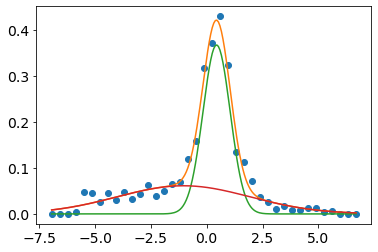

hA5 2


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


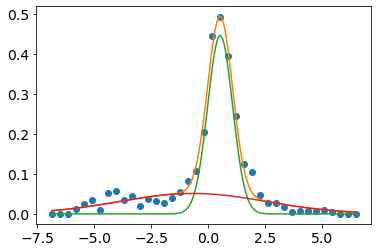

hA5 pooled


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


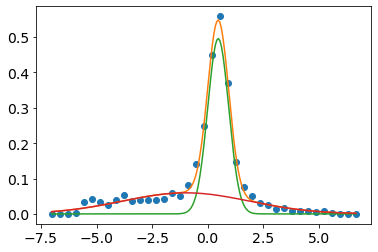

hA6 1


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


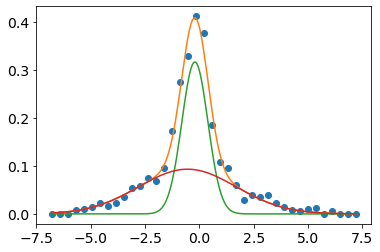

hA6 2


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


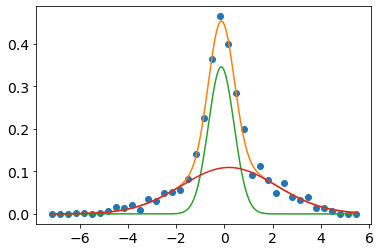

hA6 pooled


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


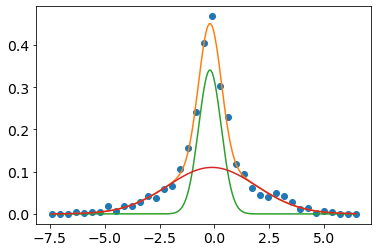

aA5A6 1


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


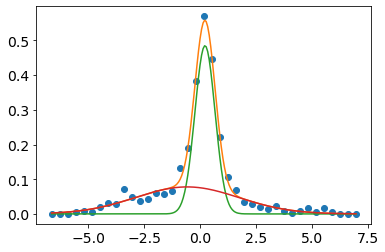

aA5A6 2


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


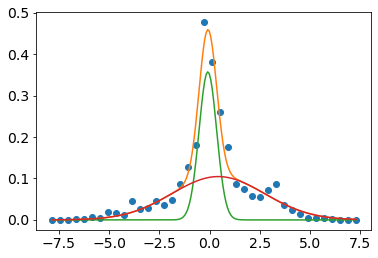

aA5A6 pooled


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


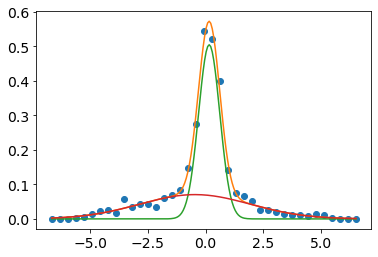

alt 1


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


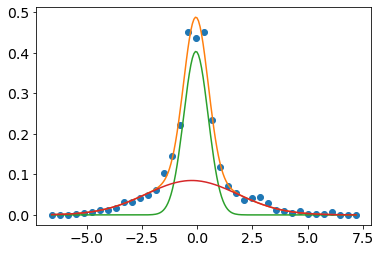

alt 2


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


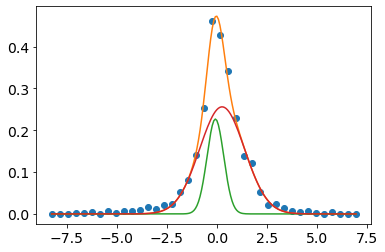

alt pooled


/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:434: RuntimeWarning: divide by zero encountered in double_scalars
  weight = 1/sigma
/Users/harmsm/work/programming/git-clones/hops_enrich/hops_enrich/enrich.py:462: RuntimeWarning: invalid value encountered in double_scalars
  seq_weight[c] = seq_weight[c]/total


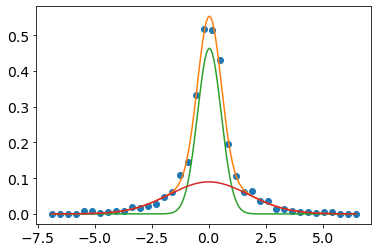

In [30]:

def get_enrichment(conv_file,comp_file,cluster_file,out_file=None,min_counts=6):

    conv = hops_enrich.enrich.load_counts_file(conv_file)
    comp = hops_enrich.enrich.load_counts_file(comp_file)
    clusters, _ = hops_enrich.cluster.read_cluster_file(cluster_file)
    enrichment, _, _, gaussian_stats = hops_enrich.enrich.calc_enrichment(conv,comp,clusters,min_counts=min_counts,out_file=out_file)
    
    unresponsive_mean = np.max(gaussian_stats[0])
    
    for k in enrichment:
        enrichment[k] = enrichment[k] - unresponsive_mean
        
    return enrichment, gaussian_stats


enrichment = {}
gaussian_stats = {}
for sample in ["hA5","hA6","aA5A6","alt"]:
    for x in ["1","2","pooled"]:
    
        print(sample,x)
    
        key = f"{sample}_{x}"
    
        e, gs = get_enrichment(f"../download-and-count/{sample}_conv_{x}.counts",
                               f"../download-and-count/{sample}_comp_{x}.counts",
                               f"{sample}_all_pooled.cluster",
                               out_file=f"{sample}_{x}.enrich",
                               min_counts=6)
        
        enrichment[key] = e
        gaussian_stats[key] = gs

        
# Write out summary statistics
out_dict = {"experiment":[],
            "r_mean":[],
            "r_std":[],
            "r_area":[],
            "u_mean":[],
            "u_std":[],
            "u_area":[]}

for sample in gaussian_stats.keys():
    means = gaussian_stats[sample][0]
    stds = gaussian_stats[sample][1]
    areas = gaussian_stats[sample][2]
    
    # Responsive distribution has largest stdev
    r_index = np.argmax(stds)
    u_index = [x for x in [0,1] if x != r_index][0]
    
    
    out_dict["experiment"].append(sample)
    out_dict["r_mean"].append(means[r_index])
    out_dict["r_std"].append(stds[r_index])
    out_dict["r_area"].append(areas[r_index])
    
    out_dict["u_mean"].append(means[u_index])
    out_dict["u_std"].append(stds[u_index])
    out_dict["u_area"].append(areas[u_index])
    
gaussian_stats_df = pd.DataFrame(out_dict)
gaussian_stats_df.to_csv("enrichment-distribution-stats.csv")

### II.3 Construct data frames holding all common peptide enrichments between different experiments

+ `aA5A6_df` (`hA5-hA6-aA5A6_enrichment.txt`) has enrichment values for all peptides in common between hA5, hA6, and aA5A6.
+ `alt_df` (`hA5-hA6-alt_enrichment.txt`) has enrichment values for all peptides in common between hA5, hA6, and alt.
+ `all_df` (`hA5-hA6-aA5A6-alt_enrichment.txt`) has enrichment values for all peptides in common between hA5, hA6, aA5A6, and alt.

In [53]:

def build_df(enrich,names):
    
    sets = []
    for e in enrich:
        sets.append(set(e.keys()))
    
    shared_seq = sets[0]
    for s in sets[1:]:
        shared_seq = shared_seq.intersection(s)
        
    out_dict = {"seq":[]}
    for n in names:
        out_dict[n] = []
    for seq in shared_seq:
        out_dict["seq"].append(seq)
        for i, e in enumerate(enrich):
            out_dict[names[i]].append(e[seq])
        
    return pd.DataFrame(out_dict)

for rep in ["1","2","pooled"]:

    aA5A6_df = build_df([enrichment[f"hA5_{rep}"],enrichment[f"hA6_{rep}"],enrichment[f"aA5A6_{rep}"]],
                        ["hA5","hA6","aA5A6"])
    aA5A6_df.to_csv(f"hA5-hA6-aA5A6_enrichment_{rep}.txt")

    alt_df = build_df([enrichment[f"hA5_{rep}"],enrichment[f"hA6_{rep}"],enrichment[f"alt_{rep}"]],
                        ["hA5","hA6","alt"])
    alt_df.to_csv(f"hA5-hA6-alt_enrichment_{rep}.txt")

    all_df = build_df([enrichment[f"hA5_{rep}"],enrichment[f"hA6_{rep}"],enrichment[f"aA5A6_{rep}"],enrichment[f"alt_{rep}"]],
                        ["hA5","hA6","aA5A6","alt"])
    all_df.to_csv(f"hA5-hA6-aA5A6-alt_enrichment_{rep}.txt")

## III. Fig S3A cluster frequencies

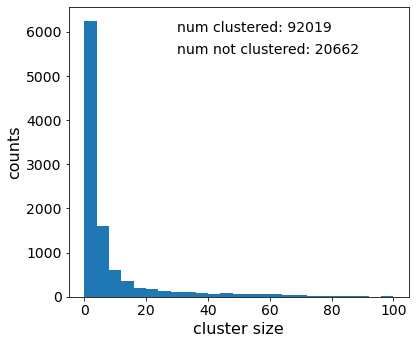

In [54]:
file_to_analyze = "hA5_all_pooled.cluster"

clusters_seen = {}
with open(file_to_analyze) as f:
    for line in f:
        if line.startswith("#") or line.strip() == "":
            continue

        c = line.split()[0]
        try:
            clusters_seen[c] += 1
        except KeyError:
            clusters_seen[c] = 1

out_dict = {"cluster":[],"counts":[]}
for c in clusters_seen:
    if c == "0":
        num_unclustered = clusters_seen[c]
        continue

    out_dict["cluster"].append(c)
    out_dict["counts"].append(clusters_seen[c])
    
df = pd.DataFrame(out_dict)

fig, ax = plt.subplots(1,figsize=(6,5))
_ = ax.hist(df.counts,bins=range(0,104,4))
ax.set_xlabel("cluster size")
ax.set_ylabel("counts")

ax.text(30,6000,"num clustered: {}".format(np.sum(df.counts)))
ax.text(30,5500,"num not clustered: {}".format(num_unclustered))

fig.tight_layout()

fig.savefig("fig_s3a.pdf")

## IV. Fig S3D
#### Compare E value computed using clustering method versus individual counts

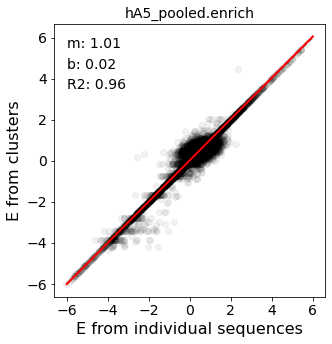

In [55]:
# File to analyze
file_to_analyze = "hA5_pooled.enrich" 

# Load data.  hops_enrich writes out enrichment value calculated using cluster
# in "E".  If there are enough counts in both the competitor and conventional 
# sample for a given peptide, it also calculates the enrichment using just those
# counts and writes out to E_from_seq.
df = load_enrichment_csv(file_to_analyze)
no_cluster_needed_to_estimate = np.logical_not(np.isnan(df.E_from_seq))
E_from_clusters = df.loc[no_cluster_needed_to_estimate,"E"]
E_from_seq = df.loc[no_cluster_needed_to_estimate,"E_from_seq"]

# Create plot
fig, ax = plt.subplots(1,figsize=(6,5))
ax.plot([-6,6],[-6,6],'--',color="gray")
ax.plot(E_from_seq,E_from_clusters,"o",alpha=0.05,color="black")

# Use orthoganol distance regression to fit linear model and determine variance
# explained
m, b, var_explained = run_odr(E_from_seq, E_from_clusters)
ax.plot([-6,6],np.array([-6,6])*m + b,"-",color="red",lw=2)
ax.text(-6,5.5,"m: {:.2f}".format(m))
ax.text(-6,4.5,"b: {:.2f}".format(b))
ax.text(-6,3.5,"R2: {:.2f}".format(var_explained))

# Various plot clean up
ax.set_xlabel("E from individual sequences")
ax.set_ylabel("E from clusters")
ax.set_title(file_to_analyze)

ax.set_xticks(range(-6,8,2))
ax.set_yticks(range(-6,8,2))

ax.set_aspect('equal', 'box')
fig.tight_layout()

fig.savefig("fig_s3d.pdf")

## V. Fig S4 (and Fig 2C)
#### Enrichment histograms and Gaussian fits

After running the cells above, see `hA5_pooled.enrich.pdf` (Fig 2C, S4A), `hA6_pooled.enrich.pdf` (Fig S4B), `aA5A6_pooled.enrich.pdf` (Fig S4C), and `alt_pooled.enrich.pdf` (Fig S4D).  

## VI. Fig 2D
#### Compare bio reps

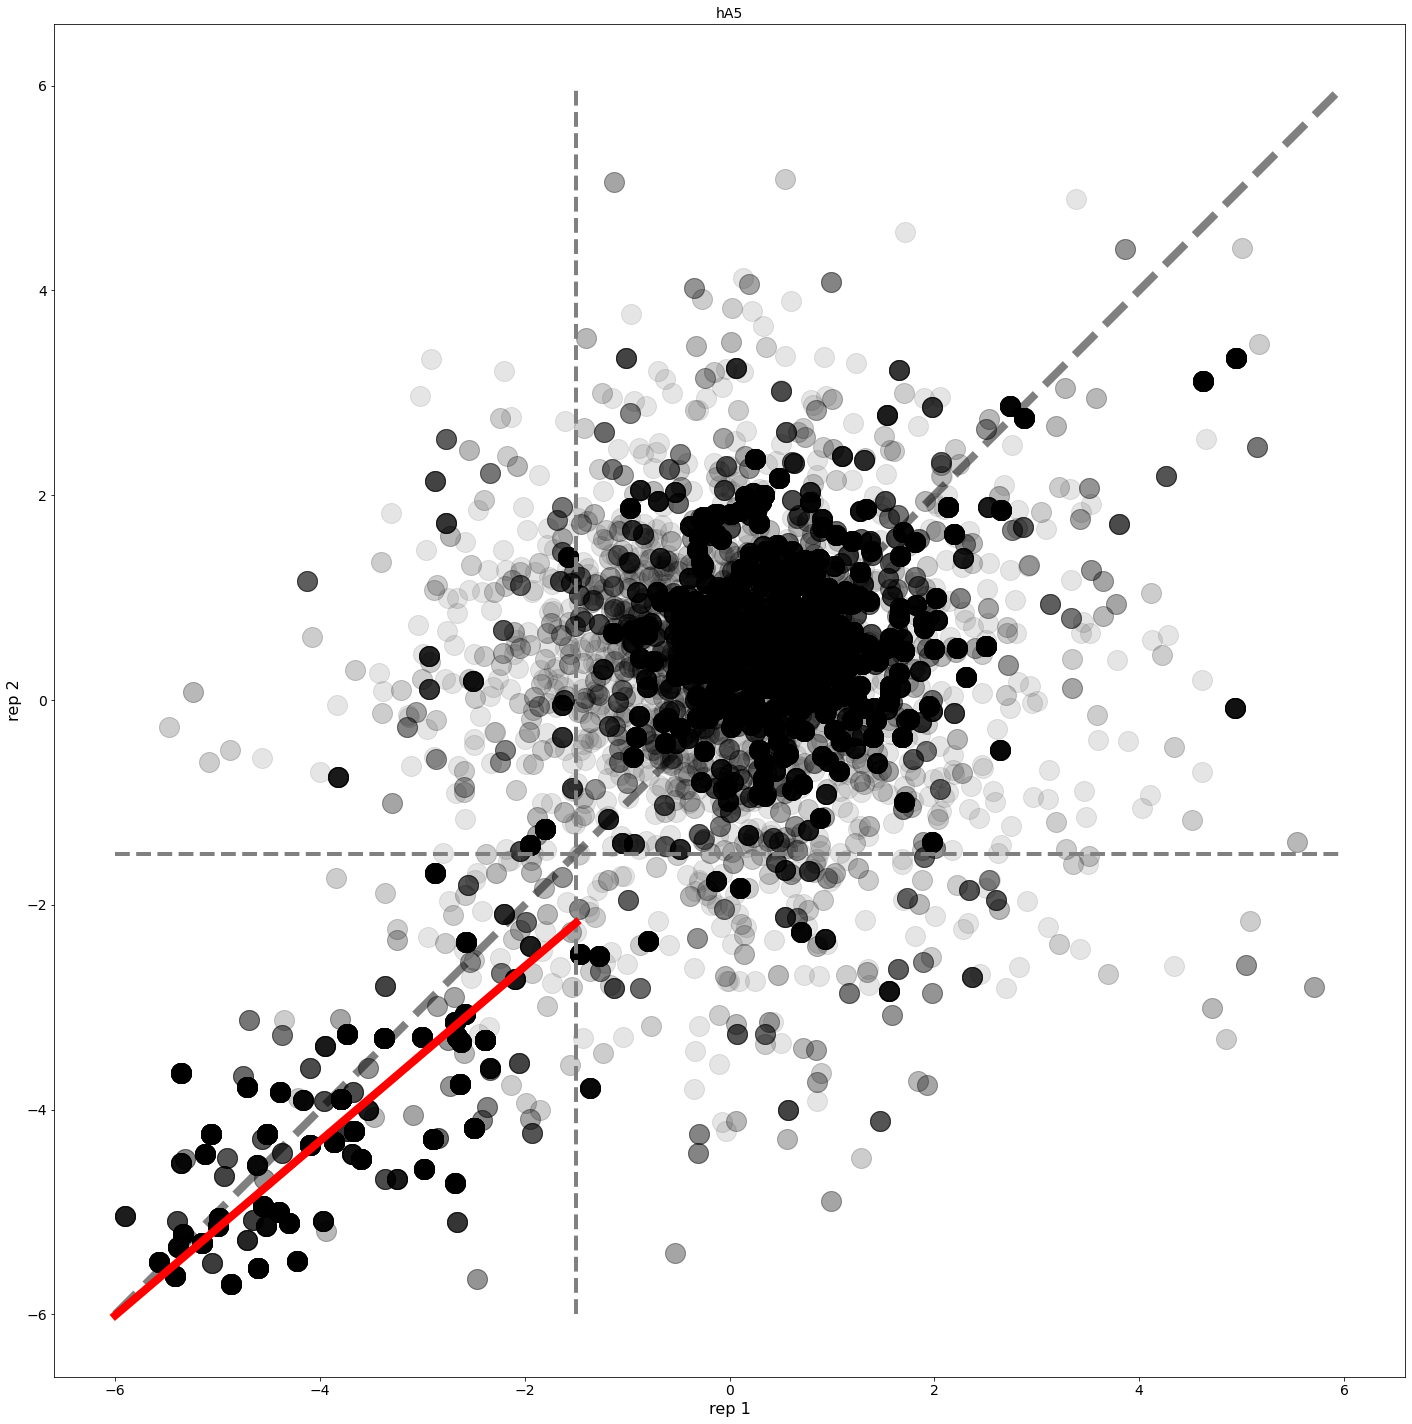

In [105]:
def compare_bioreps(protein,max_value=-1.5):

    bio1 = load_enrichment_csv(f"{protein}_1.enrich")
    bio2 = load_enrichment_csv(f"{protein}_2.enrich")

    shared_peptides = set(bio1.seq).intersection(bio2.seq)
    bio1 = bio1.loc[[s in shared_peptides for s in bio1.seq],:]
    bio1 = np.array(bio1.sort_values('seq').loc[:,"E"])

    bio2 = bio2.loc[[s in shared_peptides for s in bio2.seq],:]
    bio2 = np.array(bio2.sort_values('seq').loc[:,"E"])


    # Create plot
    fig, ax = plt.subplots(1,figsize=(24,20))
    ax.plot([-6,6],[-6,6],'--',color="gray",lw=8)
    ax.plot(bio1,bio2,"o",alpha=0.1,color="black",markersize=20)

    ax.plot([-6,6],[-1.5,-1.5],"--",color='gray',lw=4)
    ax.plot([-1.5,-1.5],[-6,6],"--",color='gray',lw=4)

    below_cutoff_mask = np.logical_and(bio1 < max_value,bio2 < max_value)

    # Use orthoganol distance regression to fit linear model and determine variance
    # explained
    m, b, var_explained = run_odr(bio1[below_cutoff_mask], bio2[below_cutoff_mask])
    ax.plot([-6,max_value],np.array([-6,max_value])*m + b,"-",color="red",lw=8)
    #ax.text(-6,5.5,"m: {:.2f}".format(m))
    #ax.text(-6,4.5,"b: {:.2f}".format(b))
    
    # Variance explained for region of interest (E < -1.5)
    r_mask = np.logical_and(bio1 < -1.5,bio2 < -1.5)
    _, _, var_explained = run_odr(bio1[r_mask],bio2[r_mask])    
    #$ax.text(-6,3.5,"R2 (E < -1.5): {:.2f}".format(var_explained))

    # Various plot clean up
    ax.set_xlabel("rep 1")
    ax.set_ylabel("rep 2")
    ax.set_title(protein)

    ax.set_xticks(range(-6,8,2))
    ax.set_yticks(range(-6,8,2))

    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    fig.savefig("fig_2d.png")

compare_bioreps("hA5")

## VII. Fig S5

In [60]:
REPLICATE = "pooled" # should be "1", "2", or "pooled"

hA5_pooled
unresponsive mean/sd 0.4771467712328462 0.4714942921276566
responsive mean/sd -0.9798173599564044 2.8631921495307293
p @ E = -1.5 0.03708780477365093
E @ p = 0.05 -1.65 p: 0.05757090574959512

hA6_pooled
unresponsive mean/sd -0.2053798835591668 0.5129267977210448
responsive mean/sd -0.11438029800256427 2.0100887103795366
p @ E = -1.5 0.06933193389641984
E @ p = 0.05 -1.65 p: 0.05381836355413154

aA5A6_pooled
unresponsive mean/sd 0.15350776060492344 0.4590268131918819
responsive mean/sd -0.4640670264463181 2.3991943074974955
p @ E = -1.5 0.026140417142149354
E @ p = 0.05 -1.65 p: 0.034131175271042084

alt_pooled
unresponsive mean/sd 0.027644858525518186 0.5177624793482487
responsive mean/sd 0.0027375316017501047 1.7395718281007928
p @ E = -1.5 0.06753776823046405
E @ p = 0.05 -1.65 p: 0.03138372194942572



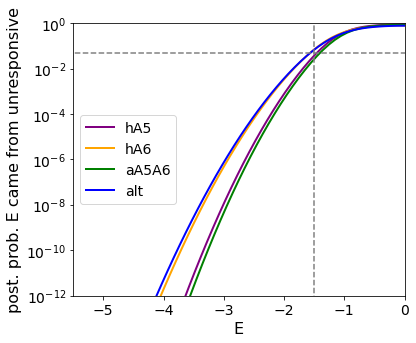

In [85]:
def p_calc(u_mean=0.482,u_std=0.4519,r_mean=-0.4473,r_std=2.267,E=None):
    """
    Return probability a peptide with score E value is from the unreponsive
    distribution rather than the unresponsive distribution.
      
    u_mean: mean of unresponsive
    u_std: std deviation of unresponsive
    r_mean: mean of responsive
    r_std: std deviation of responsive
    E: E_value for calcuation.  If None, do a range of E_values and return a df.
    """

    unresponsive = stats.norm(loc=u_mean,scale=u_std)
    responsive = stats.norm(loc=r_mean,scale=r_std)
    
    if E is None:

        out = []
        E_values = np.arange(-5,5.1,0.1)
        for E in E_values:
            r = responsive.pdf(E)
            u = unresponsive.pdf(E)

            out.append(u/(r+u))

        df = pd.DataFrame({"E":E_values - u_mean,"r":r,"u":u,"p_r":out})

        return df
    
    else:
        
        E_effective = E + u_mean
        r = responsive.pdf(E_effective)
        u = unresponsive.pdf(E_effective)
        
        return (u/(r + u))
        

def print_cutoff_stats(sample,e_value_at_p0p05):

    gs = gaussian_stats_df[gaussian_stats_df.experiment == sample]
    df = p_calc(u_mean=gs.u_mean.iloc[0],u_std=gs.u_std.iloc[0],
                r_mean=gs.r_mean.iloc[0],r_std=gs.r_std.iloc[0])
    print(sample)
    print("unresponsive mean/sd",gs.u_mean.iloc[0],gs.u_std.iloc[0])
    print("responsive mean/sd",gs.r_mean.iloc[0],gs.r_std.iloc[0])
    print("p @ E = -1.5",p_calc(u_mean=gs.u_mean.iloc[0],u_std=gs.u_std.iloc[0],
                                r_mean=gs.r_mean.iloc[0],r_std=gs.r_std.iloc[0],
                                E=-1.5))
    print("E @ p = 0.05",E_value_at_0p05,"p:",
          p_calc(u_mean=gs.u_mean.iloc[0],u_std=gs.u_std.iloc[0],
                                r_mean=gs.r_mean.iloc[0],r_std=gs.r_std.iloc[0],
                                E=e_value_at_p0p05))
    print()

    return df

gaussian_stats_df = pd.read_csv("enrichment-distribution-stats.csv")

hA5_df = print_cutoff_stats(f"hA5_{REPLICATE}",e_value_at_p0p05=-1.43)
hA6_df = print_cutoff_stats(f"hA6_{REPLICATE}",e_value_at_p0p05=-1.55)
aA5A6_df = print_cutoff_stats(f"aA5A6_{REPLICATE}",e_value_at_p0p05=-1.46)
alt_df = print_cutoff_stats(f"alt_{REPLICATE}",e_value_at_p0p05=-1.65)

fig, ax = plt.subplots(1,figsize=(6,5))

ax.plot(hA5_df.E,hA5_df.p_r,color="purple",lw=2,label="hA5")
ax.plot(hA6_df.E,hA6_df.p_r,color="orange",lw=2,label="hA6")
ax.plot(aA5A6_df.E,aA5A6_df.p_r,color="green",lw=2,label="aA5A6")
ax.plot(alt_df.E,alt_df.p_r,color="blue",lw=2,label="alt")
ax.plot((-1.5,-1.5),(1e-14,1),"--",color="gray")
ax.plot((-6,5),(0.05,0.05),"--",color="gray")

ax.set_xlim(-5.5,0)
ax.set_ylim(1e-12,1)
ax.set_yscale("log")
ax.set_xlabel("E")
ax.set_ylabel("post. prob. E came from unresponsive")
ax.legend()

fig.tight_layout()
fig.savefig("fig_s5.pdf")